In [76]:
#Basic Libs
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 9000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numerize import numerize
import missingno as mso # missging values visualization
import plotly.express as px

# Preprocessing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Metrics
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Time
import time

# Stats
from scipy.stats import norm
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

# Warnings
import warnings
warnings.filterwarnings("ignore")


In [69]:
#Load Dataset
filepath=os.getcwd()
def load_csv(filepath,chunk):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col,chunk=100000)
    return df
df.head()

print("You can also read data using API")

You can also read data using API


In [45]:
print("==="*25)
print("Data Information")
print("==="*25)
print(df.info())

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           802956 non-null  int64  
 1   Date Rptd       802956 non-null  object 
 2   DATE OCC        802956 non-null  object 
 3   TIME OCC        802956 non-null  int64  
 4   AREA            802956 non-null  int64  
 5   AREA NAME       802956 non-null  object 
 6   Rpt Dist No     802956 non-null  int64  
 7   Part 1-2        802956 non-null  int64  
 8   Crm Cd          802956 non-null  int64  
 9   Crm Cd Desc     802956 non-null  object 
 10  Mocodes         692304 non-null  object 
 11  Vict Age        802956 non-null  int64  
 12  Vict Sex        697683 non-null  object 
 13  Vict Descent    697675 non-null  object 
 14  Premis Cd       802947 non-null  float64
 15  Premis Desc     802481 non-null  object 
 16  Weapon Used Cd  279525 non-null  float6

***There are few columns for which we have to change there Dtype***

In [56]:
#Checking null values percentage
print("==="*25)
print("Checking Data has null values or not")
print("==="*25)
print(round(df.isnull().sum() * 100 / len(df),2))

Checking Data has null values or not
DR_NO              0.00
Date Rptd          0.00
DATE OCC           0.00
TIME OCC           0.00
AREA               0.00
AREA NAME          0.00
Rpt Dist No        0.00
Part 1-2           0.00
Crm Cd             0.00
Crm Cd Desc        0.00
Mocodes           13.78
Vict Age           0.00
Vict Sex          13.11
Vict Descent      13.11
Premis Cd          0.00
Premis Desc        0.06
Weapon Used Cd    65.19
Weapon Desc       65.19
Status             0.00
Status Desc        0.00
Crm Cd 1           0.00
Crm Cd 2          92.63
Crm Cd 3          99.75
Crm Cd 4          99.99
LOCATION           0.00
Cross Street      83.99
LAT                0.00
LON                0.00
dtype: float64


### **These Columns are having more than 50% missing values**

1--> Weapon Used Cd-------65.19

2--> Weapon Desc----------65.19

3--> Crm Cd 2-----------92.63

4--> Crm Cd 3------------99.75

5--> Crm Cd 4------------99.99

6--> Cross Street----------83.99

**SUGGESTION TO DROP THESE COLUMNS**

In [57]:
#Data Shape
print("**"*30)
print(f"Shape of the data are as follow {df.shape[0]} rows & {df.shape[1]} Columns")
print("**"*30)

************************************************************
Shape of the data are as follow 802956 rows & 28 Columns
************************************************************


# Have to change Dtypes of data after then we should proceed with corr()

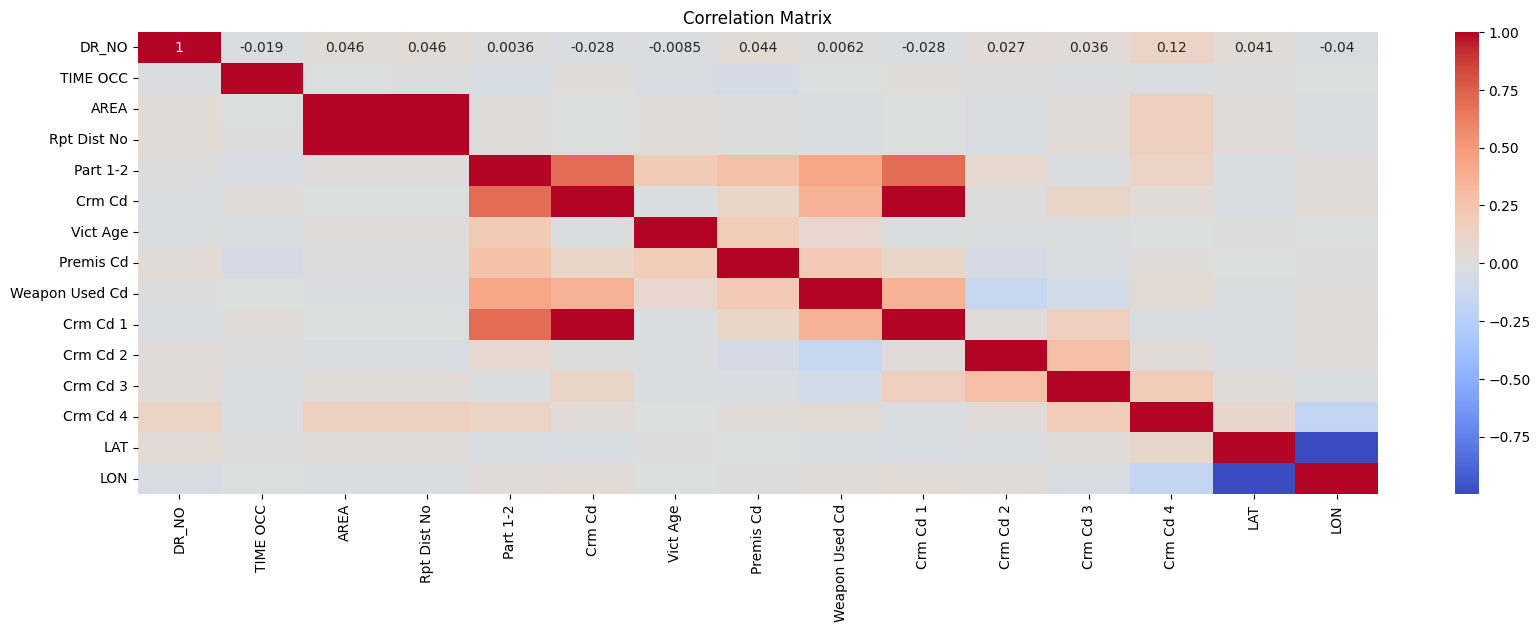

In [66]:
# Calculate the correlation matrix
numerical_columns = df.select_dtypes(include=['int64','float64']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(numerical_columns, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()